In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', category=UserWarning)

from Processing.load_dataset import Load_dataset
from Processing.processing import Split, Valid, Submission
from Engineering.enginnering import engin
from Valid.validation import rmse

from Model.lightgbm import LightGBM
from Model.xgboost import XGBOOST
from Model.nn import NN
from sklearn.metrics import mean_squared_error

In [79]:
train, test = Load_dataset()
print(len(train))
print(len(test))

195941
53509


In [ ]:
main = pd.DataFrame()
test_main = pd.DataFrame()

for contry in train['Country'].unique():
    df = train[(train['Country']==contry)]
    df = engin(df)
    
    test_pm = test[(test['Country']==contry)]
    test_pm = engin(test_pm)

    X_train, X_test, y_train, y_test, index = Split(df)
    model = LightGBM(X_train, X_test, y_train, y_test, fig=1)
    
    df.drop(["id", "pm25_mid"],axis=1, inplace=True)
    test_pm.drop(["id"], axis=1, inplace=True)
    
    test_predict = model.predict(df)
    test_pm_predict= model.predict(test_pm)
    
    tem = pd.DataFrame(test_predict, index=df.index)
    test_tem = pd.DataFrame(test_pm_predict, index=test_pm.index)

    main = pd.concat([main, tem])
    test_main = pd.concat([test_main, test_tem])

In [99]:
main = main.sort_index()
display(main.head())
print(len(main))
test_main = test_main.sort_index()
display(test_main.head())
print(len(test_main))

,0
0,17.315859
1,20.651072
2,26.385469
3,164.791097
4,160.578049


195941


,0
0,37.965243
1,38.107011
2,24.738382
3,37.607337
4,121.794941


53509


In [100]:
train, test = Load_dataset()
df_train = engin(train)
df_train = pd.concat([df_train, main], axis=1)
df_train.head()

,id,co_cnt,co_min,co_mid,co_max,co_var,o3_cnt,o3_min,o3_mid,o3_max,...,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid,0
0,1,38,0.749,2.590,2.633,0.850,29,2.397,4.295,5.916,...,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901,17.315859
1,2,47,2.594,3.181,4.828,1.208,49,3.092,7.572,12.332,...,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741,20.651072
2,3,17,1.190,1.197,2.200,0.248,123,0.736,12.527,23.432,...,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355,25.918,26.385469
3,4,63,4.586,11.044,14.802,24.186,90,1.917,14.141,38.374,...,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370,164.791097
4,5,47,4.689,8.681,11.100,10.011,83,0.349,2.349,38.600,...,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063,160.578049


In [101]:
df_test = engin(test)
df_test = pd.concat([df_test, test_main], axis=1)
df_test.head()

,id,co_cnt,co_min,co_mid,co_max,co_var,o3_cnt,o3_min,o3_mid,o3_max,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,0
0,195942,155,0.091,0.101,0.195,0.003,167,0.000,0.000,0.000,...,0.098,2.411,10.213,24.608,26,3.057,8.180,15.841,39.705,37.965243
1,195943,23,1.037,2.272,3.391,1.347,142,7.797,34.414,59.489,...,0.101,2.982,8.261,15.957,47,11.090,15.361,19.227,15.857,38.107011
2,195944,28,0.096,0.101,0.104,0.000,114,7.064,16.576,27.246,...,0.218,1.200,5.802,7.584,44,1.055,4.411,6.955,8.415,24.738382
3,195945,122,0.479,4.589,16.560,60.820,118,0.513,22.445,51.638,...,0.504,1.172,3.861,2.696,16,0.482,0.484,0.932,0.049,37.607337
4,195946,158,6.198,13.478,20.327,36.498,129,1.063,1.845,27.894,...,0.409,1.412,3.132,1.754,165,6.253,11.440,12.473,3.546,121.794941


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11729
[LightGBM] [Info] Number of data points in the train set: 125401, number of used features: 46
[LightGBM] [Info] Start training from score 59.230542
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	Train's rmse: 10.843	Test's rmse: 12.6752


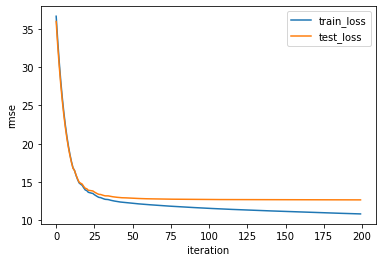

<BarContainer object of 20 artists>

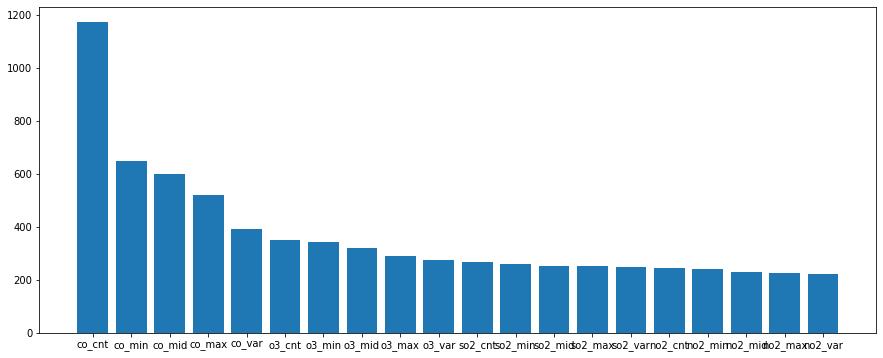

In [102]:
X_train, X_test, y_train, y_test, index = Split(df_train)
X_train, X_valid, y_train, y_valid = Valid(X_train, y_train)

Light_GBM = LightGBM(X_train, X_valid, y_train, y_valid, fig=1)
importance = pd.DataFrame(sorted(Light_GBM.feature_importance(), reverse=True), index=X_test.columns, columns=['importance'])
plt.figure(figsize=(15,6))
plt.bar(X_test.columns[:20], np.ravel(importance.values)[:20])

In [103]:
# 評価
test_predict = Light_GBM.predict(X_test)
rmse(test_predict, y_test)

RMSE:  12.562089313221911


In [105]:
df_test.drop(["id"], axis=1, inplace=True)
df_test

In [108]:
# 予測
predict_light_gbm = Light_GBM.predict(data=df_test)
index = test["id"]

In [113]:
# 提出
Submission(index, predict_light_gbm, name='stack')

In [ ]:
xgboost = XGBOOST(X_train, X_valid, y_train, y_valid, fig=1)
import xgboost as xgb
dm_test = xgb.DMatrix(X_test)
test_predict = xgboost.predict(dm_test)
rmse(test_predict, y_test)

In [ ]:
test_xgb = xgb.DMatrix(df_test)
predict_xgboost = xgboost.predict(test, ntree_limit=xgboost.best_ntree_limit)

Submission(index, predict_xgboost, name='xgb_1')